In [43]:
import numpy as np
import pandas as pd


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


In [4]:
device_fp = pd.read_csv("DBVersions/device_fp_plus_cosensclust.csv", index_col=0).drop(["Used Co-adsorbent"], axis=1)
device_fp.head(3)

,Electrolyte_0.005 M isopropanol solution of H2PtCl6·6H2O,Electrolyte_AN-50,Electrolyte_Bromide_Tribromide,Electrolyte_Co(II)_Co(III),Electrolyte_Cu(I)_Cu(II),"Electrolyte_DHS-Z23, Heptachroma",Electrolyte_DMPIC_DMPIDC,Electrolyte_Dyesol Mixes,"Electrolyte_EMISCN, K(SeCN)3, GuanThio, NMB",Electrolyte_Iodide_Triiodide,...,"Co-adsorbent Conc. (mM)_(1476.0, 1967.667]","Co-adsorbent Conc. (mM)_(1967.667, 2459.333]","Co-adsorbent Conc. (mM)_(2459.333, 2951.0]","Co-adsorbent Conc. (mM)_(2951.0, 3442.667]","Co-adsorbent Conc. (mM)_(3442.667, 3934.333]","Co-adsorbent Conc. (mM)_(3934.333, 4426.0]",CoSensCluster_0,CoSensCluster_1,CoSensCluster_2,CoSensCluster_None
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [17]:
db_df = pd.read_csv("DBVersions/rawDSSCDBdata.csv")

In [19]:
db_df

,VOC,JSC,FF,PCE,Electrolyte,Active area,Co-adsorbent,Co-sensitizer,Semiconductor,Dye loading,...,Article EID,Article year,Article year.1,Article electronic id,Article keywords,Molecule SMILE,Molecule keywords,Molecule spectrum absorption maxima,Molecule spectrum emission maxima,Molecule spectrum solvent
0,687.0,10.79,0.70,5.19,0.6 M 1-methyl-3-propylimidazolium iodide (PMI...,-,-,-,TiO2 (20 nm particle size),-,...,NaN,01/01/2012,Hong_2012,NaN,NaN,N#C/C(=C\c1ccc(cc1)N(c1ccccc1)CCCCCCN1c2ccccc2...,phenothiazine,439.0,576.0,CH2Cl2/MeOH (1:1)
1,790.0,6.90,0.47,2.60,"0.17 M Spiro-MeOTAD, 0.11 mM tert-butylpyridin...",0.158,-,-,TiO2 film (8 uM thick + 5 uM scattering layer),-,...,NaN,01/01/2010,Alibabaei_2010,NaN,NaN,N#C/C(=C\c1ccc(s1)c1ccc(s1)c1ccc(cc1)N(c1ccc(c...,"coumarin, triphenylamine",465.0,640.0,dichloromethane
2,835.0,7.70,0.49,3.10,"0.17 M Spiro-MeOTAD, 0.11 mM tert-butylpyridin...",0.158,-,-,TiO2 film (8 uM thick + 5 uM scattering layer),-,...,NaN,01/01/2010,Alibabaei_2010,NaN,NaN,N#C/C(=C\c1ccc(s1)c1ccc(cc1)N(c1ccc(cc1)/C=C/c...,"coumarin, triphenylamine",460.0,590.0,dichloromethane
3,800.0,6.40,0.43,2.20,"0.17 M Spiro-MeOTAD, 0.11 mM tert-butylpyridin...",0.158,-,-,TiO2 film (8 uM thick + 5 uM scattering layer),-,...,NaN,01/01/2010,Alibabaei_2010,NaN,NaN,CCN(c1ccc2c(c1)oc(=O)c(c2)/C=C/c1ccc(cc1)N(c1c...,"coumarin, triphenylamine",454.0,525.0,dichloromethane
4,651.0,10.30,0.75,5.00,"1,3-dimethylimidazolium iodide, 1-ethyl-3methy...",0.158,-,-,TiO2 film (8 uM thick + 5 uM scattering layer),-,...,NaN,01/01/2010,Alibabaei_2010,NaN,NaN,N#C/C(=C\c1ccc(s1)c1ccc(s1)c1ccc(cc1)N(c1ccc(c...,"coumarin, triphenylamine",465.0,640.0,dichloromethane
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4421,666.0,17.84,0.74,8.79,0.6 M 1-methyl-3-propylimidazolium iodide (PMI...,0.12 cm2,-,-,TiO2 film 14 um,-,...,NaN,01/01/2018,Liao_2018,NaN,NaN,S=C=N[Ru]12(N=C=S)(N3CCC(CC3C3N2CCC(C3)C(=O)[O...,"N719, Ruthenium",NaN,NaN,-
4422,651.0,9.93,0.70,4.52,0.6 M 1-methyl-3-propylimidazolium iodide (PMI...,0.12 cm2,-,-,TiO2 film 14 um,296 nmol/cm2,...,NaN,01/01/2018,Liao_2018,NaN,NaN,C(#N)/C(/C(=O)O)=C\C=1SC(=CC1)C=1C=CC=2N(C3=CC...,phenothiazine,473.0,NaN,CH2Cl2/EtOH
4423,667.0,12.85,0.71,6.09,0.6 M 1-methyl-3-propylimidazolium iodide (PMI...,0.12 cm2,-,-,TiO2 film 14 um,224 nmol/cm2,...,NaN,01/01/2018,Liao_2018,NaN,NaN,CSC1=CC=C(C=C1)C=1C=C2SC=3C=C(C=CC3N(C2=CC1)CC...,phenothiazine,472.0,NaN,CH2Cl2/EtOH
4424,659.0,12.46,0.69,5.65,0.6 M 1-methyl-3-propylimidazolium iodide (PMI...,0.12 cm2,-,-,TiO2 film 14 um,187 nmol/cm2,...,NaN,01/01/2018,Liao_2018,NaN,NaN,COC1=CC=C(C=C1)C=1C=C2SC=3C=C(C=CC3N(C2=CC1)CC...,phenothiazine,470.0,NaN,CH2Cl2/EtOH


In [27]:
def last_author(authors):
    author_lst = authors.split(" and ")
    last_author_str = author_lst[-1]
    last_author_last_name = last_author_str.split(" ")[-1]
    last_author_str_cond = last_author_str[0] + f". {last_author_last_name}"
    return last_author_str_cond

In [45]:
db_df["LastAuthor"] = db_df["Article author"].apply(last_author)
most_prevelant_authors = list(db_df.groupby(["LastAuthor"]).count().sort_values(["PCE"], ascending=False).head(20).index)
most_prevelant_authors

['M. Grätzel',
 'L. Sun',
 'J. Lin',
 'S. Xue',
 'K. Ho',
 'D. Cao',
 'T. Takahashi',
 'W. Zhu',
 'Z. Li',
 'H. Tian',
 'S. Tan',
 'H. Kim',
 'J. Hua',
 'T. Chow',
 'P. Wang',
 'J. Kim',
 'Y. Xie',
 'K. Hara',
 'C. Lin',
 'J. Zheng']

In [46]:
author_list = list(db_df.groupby(["LastAuthor"]).count().sort_values(["PCE"], ascending=False).index)

In [47]:
authors = db_df.LastAuthor
authors.to_csv("AuxillaryInfo/authors_cleaned.csv")

In [48]:
device_ = device_fp.loc[db_df.LastAuthor.str.contains('|'.join(most_prevelant_authors))]
authors_ = authors.loc[db_df.LastAuthor.str.contains('|'.join(most_prevelant_authors))]
authors_

0           D. Cao
1       M. Grätzel
2       M. Grätzel
3       M. Grätzel
4       M. Grätzel
           ...    
4366        S. Xue
4369        H. Kim
4370        S. Xue
4371        S. Xue
4372        S. Xue
Name: LastAuthor, Length: 1818, dtype: object

In [49]:
import helper_funcs as my_funcs

Training Classification Report:
              precision    recall  f1-score   support

      C. Lin       1.00      1.00      1.00        39
      D. Cao       0.99      0.91      0.95        77
      H. Kim       1.00      1.00      1.00        57
     H. Tian       1.00      1.00      1.00        65
      J. Hua       0.95      0.98      0.96        56
      J. Kim       1.00      1.00      1.00        50
      J. Lin       0.95      0.97      0.96       109
    J. Zheng       0.97      1.00      0.99        35
     K. Hara       1.00      1.00      1.00        43
       K. Ho       0.97      0.99      0.98       103
      L. Sun       1.00      1.00      1.00       138
  M. Grätzel       1.00      0.99      1.00       145
     P. Wang       1.00      1.00      1.00        53
      S. Tan       1.00      1.00      1.00        60
      S. Xue       0.99      1.00      1.00       105
     T. Chow       0.98      1.00      0.99        56
T. Takahashi       1.00      0.99      0.99      

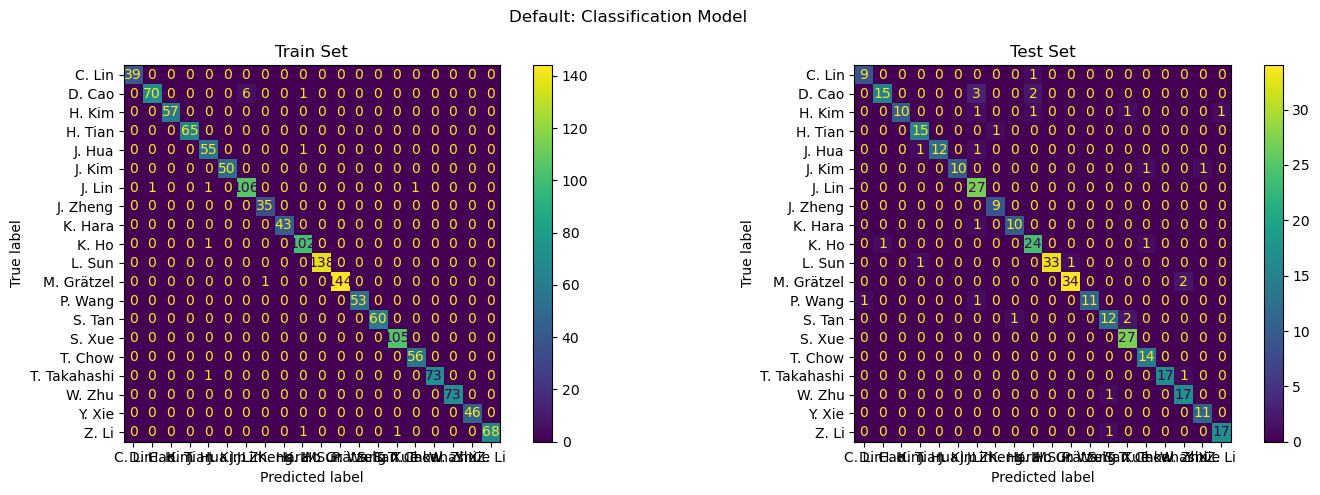

In [50]:
X_train, X_test, Y_train, Y_test = train_test_split(device_, authors_, test_size=0.2, stratify=authors_)

rf_clf = RandomForestClassifier(n_estimators=200)
rf_clf.fit(X_train, Y_train)

my_funcs.classification_results(clf_model=rf_clf, X_train=X_train, X_test=X_test, Y_train=Y_train, Y_test=Y_test)